# Data Visualisation

Its no use having all this data if nobody can understand it.

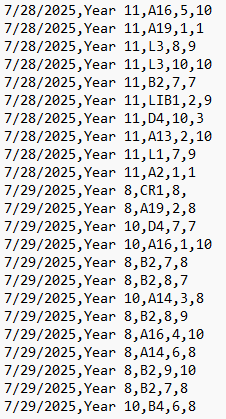
<br>
Like nobody can understand this!

So, we need to make a graph or some kind of visualisation.

# My Solution

My hypothesis tests correlation and A's effect on B. Thus, the best form of visualisation is a correlation dot plot.

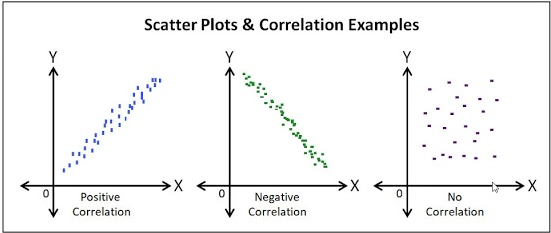
<br>
Like these!

## The Plan

Its actually rather simple to make one of these dot plots. I can just use matplotlib to define a graph:

* Titled "Correlation Between Room Decoration and Student Learning"
* Y-Axis "Room Decoration (10 means lots of eye level student artworks/posters)"
* X-Axis "Student Learning (10 means they can actually understand the content)"

Then set each row as a dot with the Y coordinate being their room decoration score and the X coordinate as their student learning score in order to get a dot plot that should show a clump of dots. Then I'd use numpy or matplotlib to find the mathematical correlation factor and display that at the bottom of the graph.

<hr>

### Let's code it!

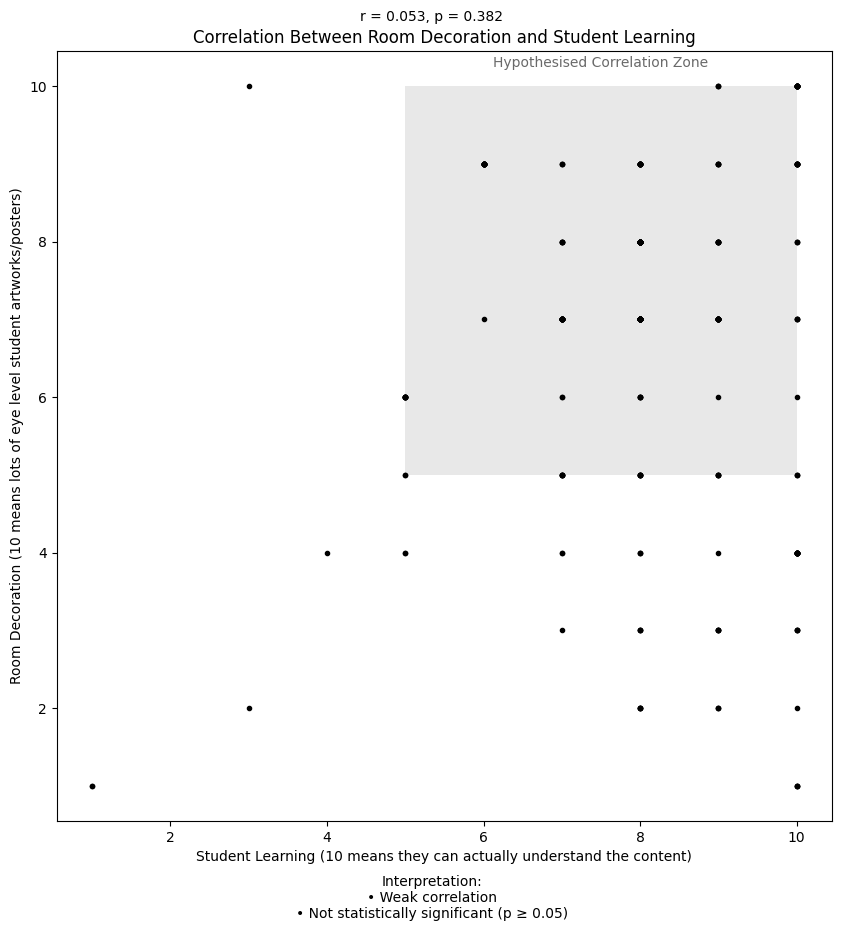

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import pearsonr
import matplotlib.patches as patches

def interpret_correlation(r):
    abs_r = abs(r)
    if abs_r < 0.3:
        return "Weak correlation"
    elif abs_r < 0.7:
        return "Moderate correlation"
    else:
        return "Strong correlation"

def interpret_significance(p):
    if p < 0.001:
        return "Highly significant (p < 0.001)"
    elif p < 0.05:
        return "Statistically significant (p < 0.05)"
    else:
        return "Not statistically significant (p ≥ 0.05)"


def plot_data(file_path):
    data = pd.read_csv(file_path)

    if 'RoomDecor' in data.columns and 'RoomLearn' in data.columns:
        data = data.dropna(subset=['RoomDecor', 'RoomLearn'])
        x = data['RoomLearn'].values
        y = data['RoomDecor'].values
        correlation, p_value = pearsonr(x, y)

        # Create figure and axis
        fig, ax = plt.subplots(figsize=(10, 10))

        # Plot the data
        ax.plot(x, y, marker='.', linestyle=' ', color='k')

        # Add grey box from (5,5) to (10,10)
        hypothesis_box = patches.Rectangle(
            (5, 5), 5, 5,  # (x, y), width, height
            linewidth=0,
            facecolor='lightgrey',
            alpha=0.5
        )
        ax.add_patch(hypothesis_box)

        # Titles and labels
        ax.set_title('Correlation Between Room Decoration and Student Learning')
        fig.text(0.5, 0.91, f"r = {correlation:.3f}, p = {p_value:.3f}", ha='center', fontsize=10)
        ax.set_xlabel('Student Learning (10 means they can actually understand the content)')
        ax.set_ylabel('Room Decoration (10 means lots of eye level student artworks/posters)')
        # Add label centered in the grey box
        ax.text(7.5, 10.2, "Hypothesised Correlation Zone", ha='center', va='bottom', fontsize=10, color='dimgray')
        # Add interpretation of correlation and significance
        correlation_strength = interpret_correlation(correlation)
        significance = interpret_significance(p_value)
        # Add interpretation textbox
        interpretation_text = f"Interpretation:\n• {correlation_strength}\n• {significance}"
        fig.text(0.5, 0.01, interpretation_text, ha='center', va='bottom', fontsize=10)


        ax.grid(False)

        plt.show()
    else:
        print("The required columns 'RoomDecor' and 'RoomLearn' are not present in the file.")

if __name__ == "__main__":
    plot_data('CleanedDataset-Manual.csv')
# This script reads a CSV file, processes the data, and plots a correlation graph
# between room decoration and student learning, including a hypothesis box.

# OH! What Have We Here?

There's meant to be 277 dots? Why do I count so much less?

Well maybe because there's a lot of overlaps. But how do we check that? With a 2D histogram not this 1D representation.

<hr>

### Let's try it!

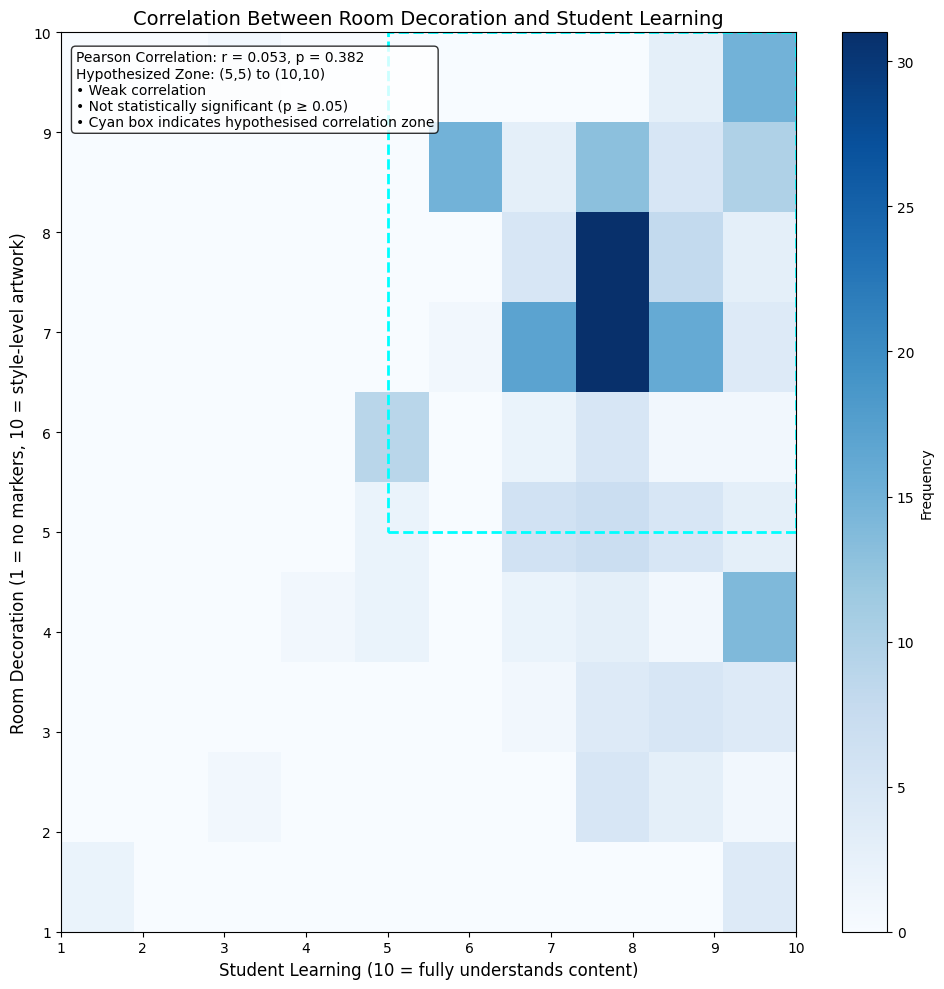

In [36]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import pearsonr

# Load and clean data
data = pd.read_csv('CleanedDataset-Manual.csv')  # Replace with your actual file path
data['RoomDecor'] = pd.to_numeric(data['RoomDecor'], errors='coerce')
data['RoomLearn'] = pd.to_numeric(data['RoomLearn'], errors='coerce')
data = data.dropna(subset=['RoomDecor', 'RoomLearn'])

# Calculate correlation
r, p = pearsonr(data['RoomLearn'], data['RoomDecor'])

# Plot 2D histogram
plt.figure(figsize=(10, 10))
hist = plt.hist2d(data['RoomLearn'], data['RoomDecor'], bins=[10, 10], cmap='Blues')
plt.colorbar(label='Frequency')

# Draw hypothesized zone (5,5 to 10,10)
plt.gca().add_patch(plt.Rectangle((5, 5), 5, 5, linewidth=2, edgecolor='cyan',
                                  facecolor='none', linestyle='--'))

# Add interpretation box in top-left corner of axes
interpretation_text = (
    f"Pearson Correlation: r = {r:.3f}, p = {p:.3f}\n"
    "Hypothesized Zone: (5,5) to (10,10)\n"
    "• Weak correlation\n"
    "• Not statistically significant (p ≥ 0.05)\n"
    "• Cyan box indicates hypothesised correlation zone"
)
plt.gca().text(0.02, 0.98, interpretation_text, transform=plt.gca().transAxes,
               fontsize=10, verticalalignment='top',
               bbox=dict(boxstyle='round', facecolor='white', edgecolor='black', alpha=0.8))

# Labels and grid
plt.xlabel('Student Learning (10 = fully understands content)', fontsize=12)
plt.ylabel('Room Decoration (1 = no markers, 10 = style-level artwork)', fontsize=12)
plt.title('Correlation Between Room Decoration and Student Learning', fontsize=14)
plt.grid(False)
plt.tight_layout()
plt.show()


# Ahhh much better!

Now we can not only see the correlation, but also the frequency!

# Let's take it a step further, shall we?

Now what if we overlayed the graphs? Then it would show us correlation, and where most people placed their responses. That would be awesome!

<hr>

### Let's make it happen!

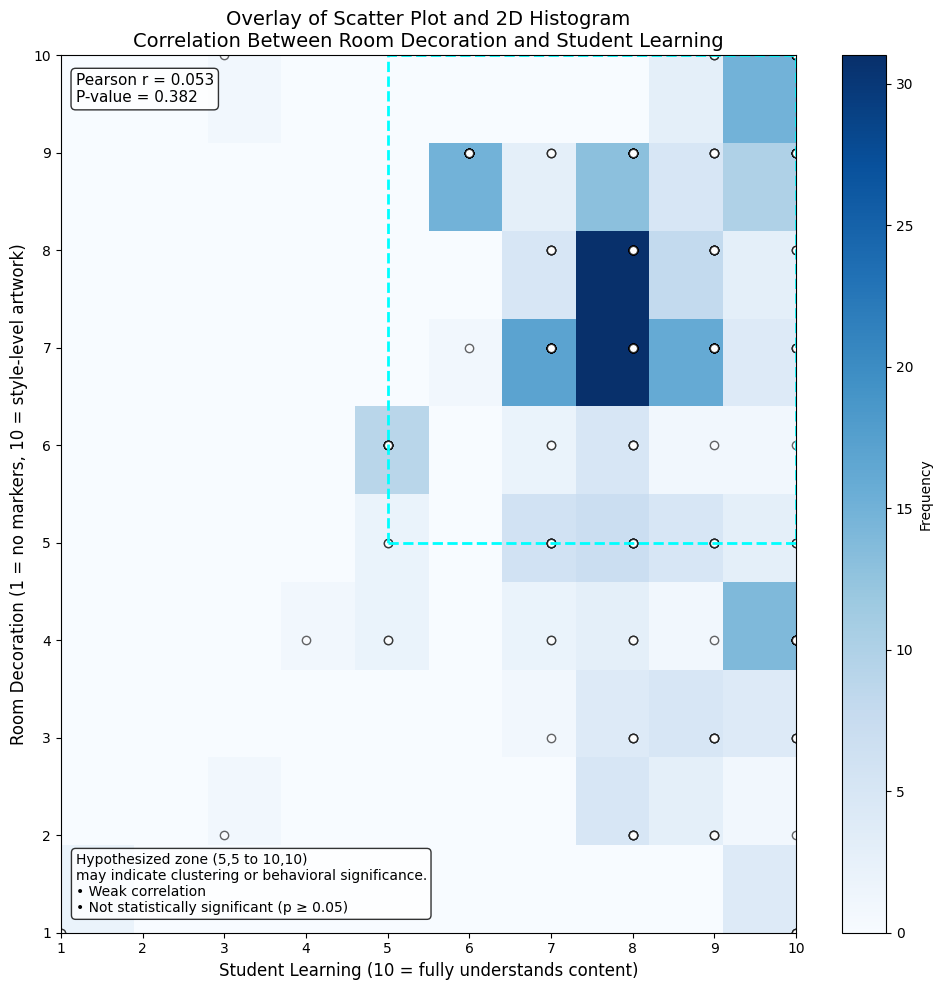

: 

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import pearsonr

# Load and clean data
data = pd.read_csv('CleanedDataset-Manual.csv')  # Replace with your actual file path
data['RoomDecor'] = pd.to_numeric(data['RoomDecor'], errors='coerce')
data['RoomLearn'] = pd.to_numeric(data['RoomLearn'], errors='coerce')
data = data.dropna(subset=['RoomDecor', 'RoomLearn'])

# Extract variables
x = data['RoomLearn']
y = data['RoomDecor']

# Calculate correlation
r, p = pearsonr(x, y)

# Create figure
plt.figure(figsize=(10, 10))

# Plot 2D histogram
hist = plt.hist2d(x, y, bins=[10, 10], cmap='Blues')
plt.colorbar(label='Frequency')

# Overlay scatter plot
plt.scatter(x, y, color='white', edgecolor='black', alpha=0.6, label='Individual Responses')

# Draw hypothesized zone (5,5 to 10,10)
plt.gca().add_patch(plt.Rectangle((5, 5), 5, 5, linewidth=2, edgecolor='cyan',
                                  facecolor='none', linestyle='--'))

# Add correlation stats (top-left)
plt.gca().text(0.02, 0.98, f"Pearson r = {r:.3f}\nP-value = {p:.3f}",
               transform=plt.gca().transAxes, fontsize=11,
               verticalalignment='top',
               bbox=dict(boxstyle='round', facecolor='white', edgecolor='black', alpha=0.8))

# Add interpretation box (bottom-left)
interpretation_text = (
    "Hypothesized zone (5,5 to 10,10)\n"
    "may indicate clustering or behavioral significance.\n"
    "• Weak correlation\n"
    "• Not statistically significant (p ≥ 0.05)"
)
plt.gca().text(0.02, 0.02, interpretation_text,
               transform=plt.gca().transAxes, fontsize=10,
               verticalalignment='bottom',
               bbox=dict(boxstyle='round', facecolor='white', edgecolor='black', alpha=0.8))

# Labels and title
plt.xlabel('Student Learning (10 = fully understands content)', fontsize=12)
plt.ylabel('Room Decoration (1 = no markers, 10 = style-level artwork)', fontsize=12)
plt.title('Overlay of Scatter Plot and 2D Histogram\nCorrelation Between Room Decoration and Student Learning', fontsize=14)
plt.grid(False)
plt.tight_layout()
plt.show()


# See what we've done!

We've gone through and weve put together a frequency histogram and scatter plot. It tells us where most of the responses are, the correlation between the variables, and it tells us the mathematical correlation factor and p-value with a text interpretation making for seamless understanding.

## Overall, a job well done!

<hr>

### Next we move onto the UI! See UI.ipynb!